# Projeto de credit Scoring

In [ ]:
import pandas as pd

In [ ]:

url='https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.'%(linhas, colunas))


A base de dados tem 1000 linhas e 21 colunas.


In [ ]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()
print('A base de dados tem %s dados duplicados.'%(duplicados))

A base de dados tem 0 dados duplicados.


In [ ]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [ ]:
chave = list(dados.conta_corrente.unique())
chave

['< 0 DM',
 '0 <= ... < 200 DM',
 'no checking account',
 '>= 200 DM / salary assignments for at least 1 year']

In [ ]:
cols_subs = list(dados.select_dtypes(exclude='number').columns)

lista = []

for i in cols_subs:
  chave = list(dados[i].unique())
  n=0
  dicionario = {}
  for val in chave:
    n+=1
    dicionario[val]=n
  lista.append(dicionario)  
lista

[{'0 <= ... < 200 DM': 2,
  '< 0 DM': 1,
  '>= 200 DM / salary assignments for at least 1 year': 4,
  'no checking account': 3},
 {'all credits at this bank paid back duly': 5,
  'critical account/ other credits existing (not at this bank)': 1,
  'delay in paying off in the past': 3,
  'existing credits paid back duly till now': 2,
  'no credits taken/ all credits paid back duly': 4},
 {'(vacation - does not exist?)': 2,
  'business': 6,
  'car (new)': 4,
  'car (used)': 5,
  'domestic appliances': 1,
  'education': 8,
  'furniture/equipment': 9,
  'radio/television': 3,
  'repairs': 7,
  'retraining': 10},
 {'.. >= 1000 DM ': 4,
  '... < 100 DM': 2,
  '100 <= ... < 500 DM': 5,
  '500 <= ... < 1000 DM ': 3,
  'unknown/ no savings account': 1},
 {'.. >= 7 years': 1,
  '... < 1 year ': 5,
  '1 <= ... < 4 years': 2,
  '4 <= ... < 7 years': 3,
  'unemployed': 4},
 {'female : divorced/separated/married': 2,
  'male : divorced/separated': 3,
  'male : married/widowed': 4,
  'male : single': 

In [ ]:
# cópia do df
dados_normais = dados.copy()

In [ ]:
for i,val in zip(cols_subs, lista):
  dados[i] = dados[i].map(val)  

dados.head()  

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1


In [ ]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [ ]:
x = dados.drop(columns='default')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed=77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size = 0.3, random_state=seed)

In [ ]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('a base de treino tem %s e a base de teste tem %s elemnetos.'%(base_treino,base_teste))

a base de treino tem 700 e a base de teste tem 300 elemnetos.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo = LogisticRegression(max_iter=1000, random_state=seed)
modelo.fit(treino_x,treino_y)
print(modelo.score(treino_x,treino_y))

0.7585714285714286


In [ ]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia =round(acuracia, 3)*100
acuracia

76.7

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

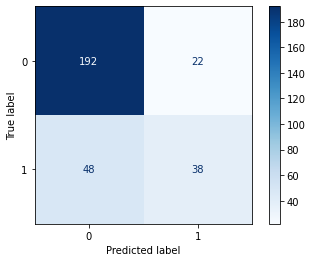

In [ ]:
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
matriz_confusao

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.63      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300



Acuracia de de 76.6% significa que a cada 100 casos ele acerta 77

Precision = verdadeiros positivos/ ( verdadeiros positivos + falsos positivos) proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria

Recall = verdadeiros positivos/ ( verdadeiros positivos + falsos negativos)
proporção de predições corretas da categoria alvo similar Sensibilidade

f1-score = 2*((Precision*Recall)/(Precision+Recall)) Média harmõnica entre Precicion e Recall, resumo dessas duas métricas

Support = quantidade absouta encontrado em cada categoria


roc_auc 0.7593457943925233


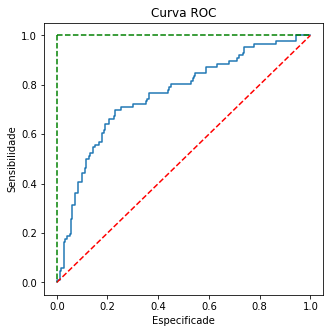

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tvp = taxa de falsos positivos
#tvp = taxa de verdadeiros positivos

# vai definir qual vai ser a minha curva roc
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

# calcula qual é a área sob a curva roc através de uma integral
print('roc_auc', roc_auc_score(teste_y , prob_previsao)) 

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')

plt.plot(tfp, tvp)
plt.xlabel('Especificade') # taxa de falsos positivos
plt.ylabel('Sensibilidade') # taxa de verdadeiros positivo
plt.plot([0,1], ls="--", c = 'red')# plotando linha guia pontilhada vermelha
plt.plot([0,0],[1,0], ls="--", c = 'green'), plt.plot([1,1], ls= "--", c = 'green')  # plotando linha guia pontilhada vermelha
plt.show()

In [ ]:
 variaveis_analises = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
 dados[variaveis_analises].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [ ]:
dados['sexo_est_civil'].value_counts()

# temos 310 mulheres e 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [ ]:
dados['default'].value_counts()

# a nossa base de dados é desbalanceada, por isso a acuracia não é um bom indicador

0    700
1    300
Name: default, dtype: int64

In [ ]:
import seaborn as sns

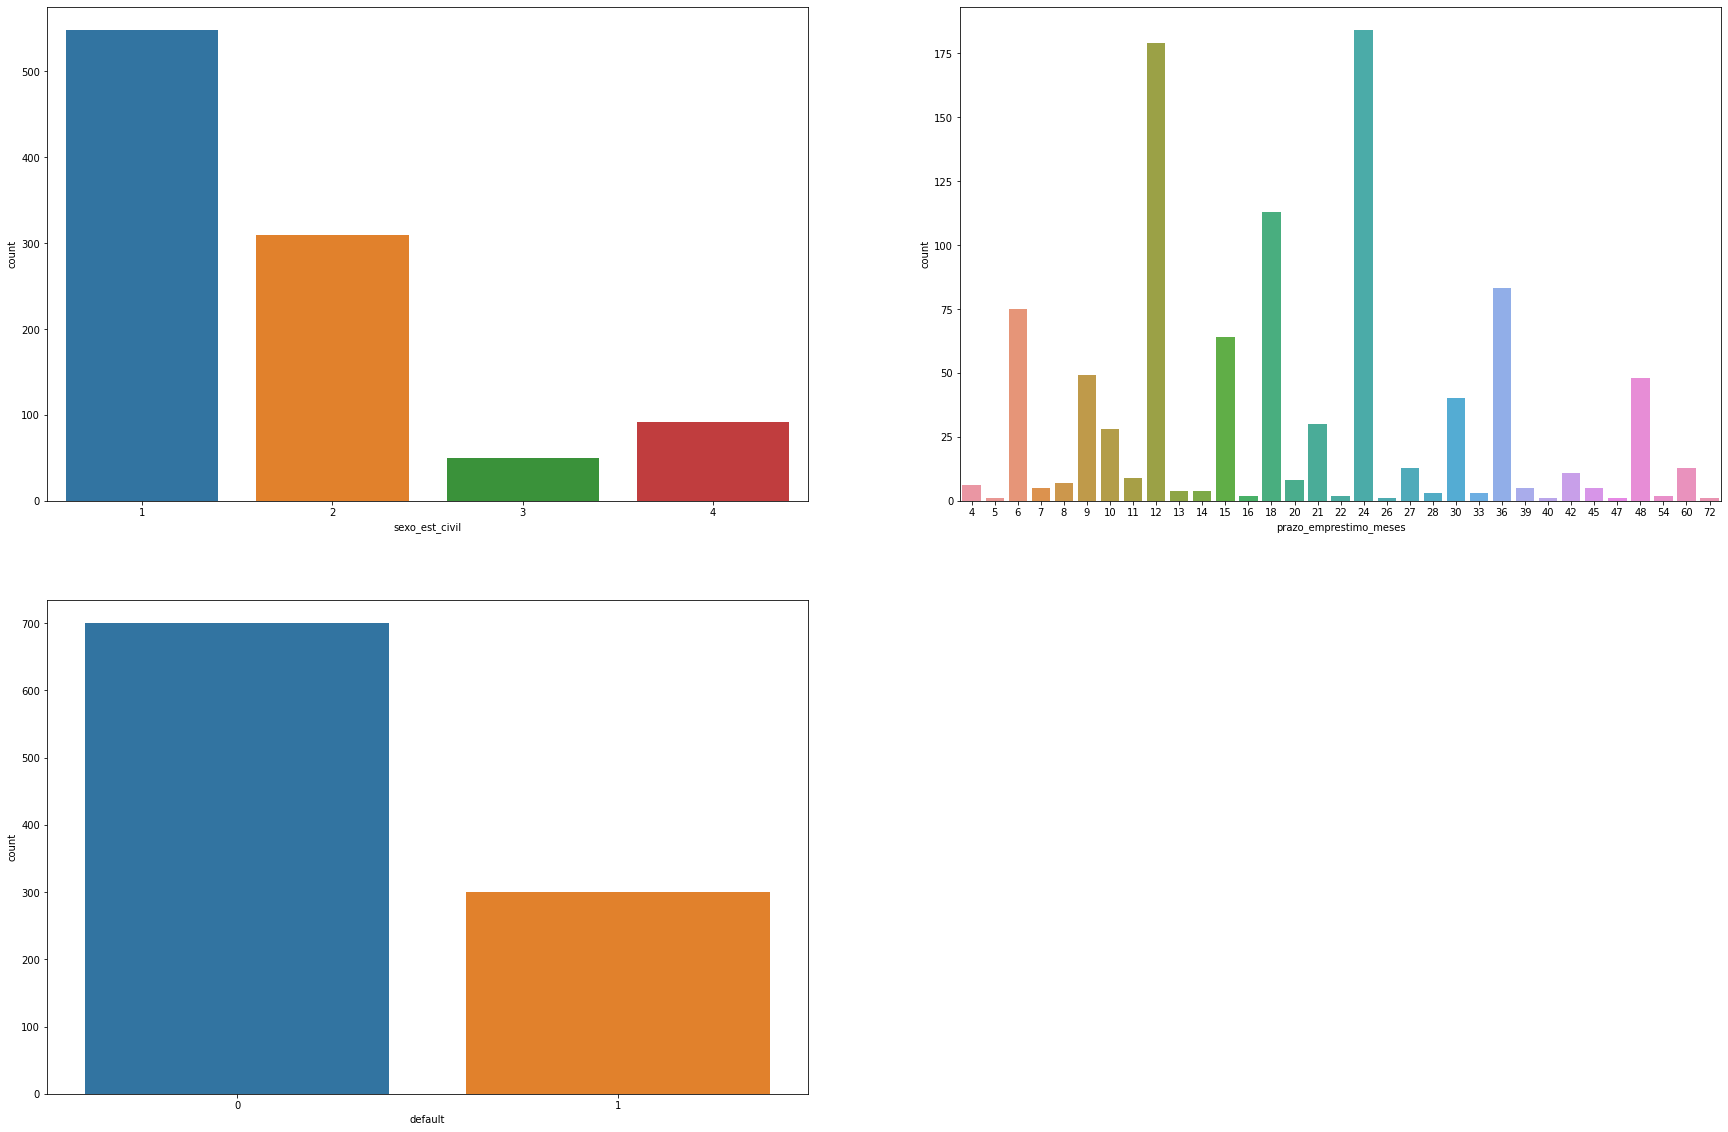

In [ ]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default' ]

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize=(30,20))
for i in lista_histogramas:
  plt.subplot(2, 2, i[0]+1)
  sns.countplot(x= i[1], data= dados)

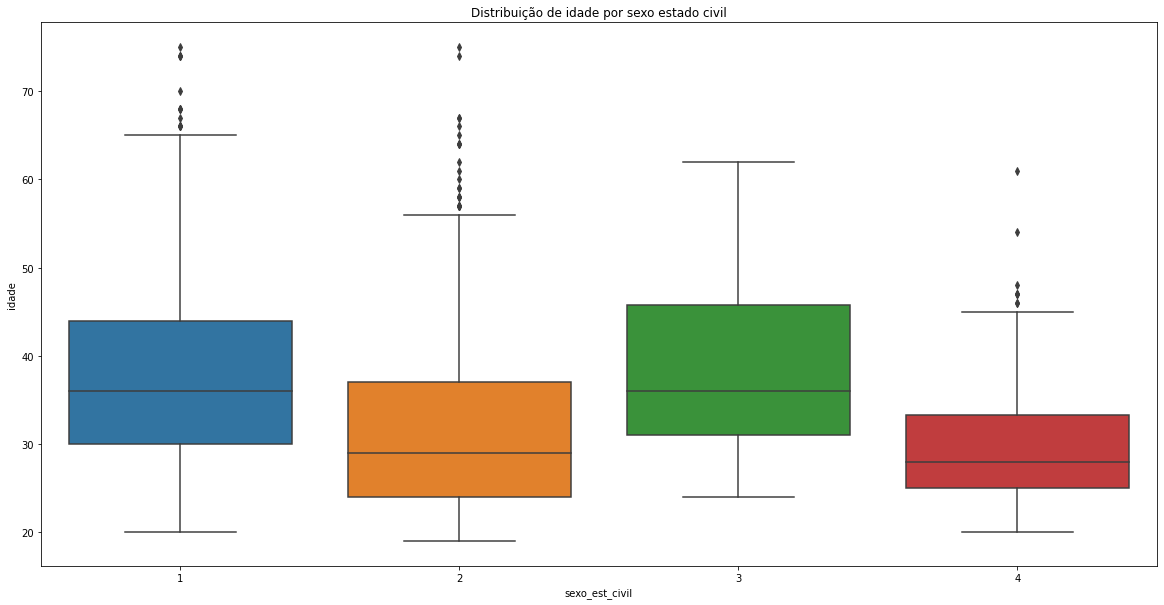

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x= 'sexo_est_civil', y= 'idade', data= dados)
plt.title('Distribuição de idade por sexo estado civil')

plt.show()

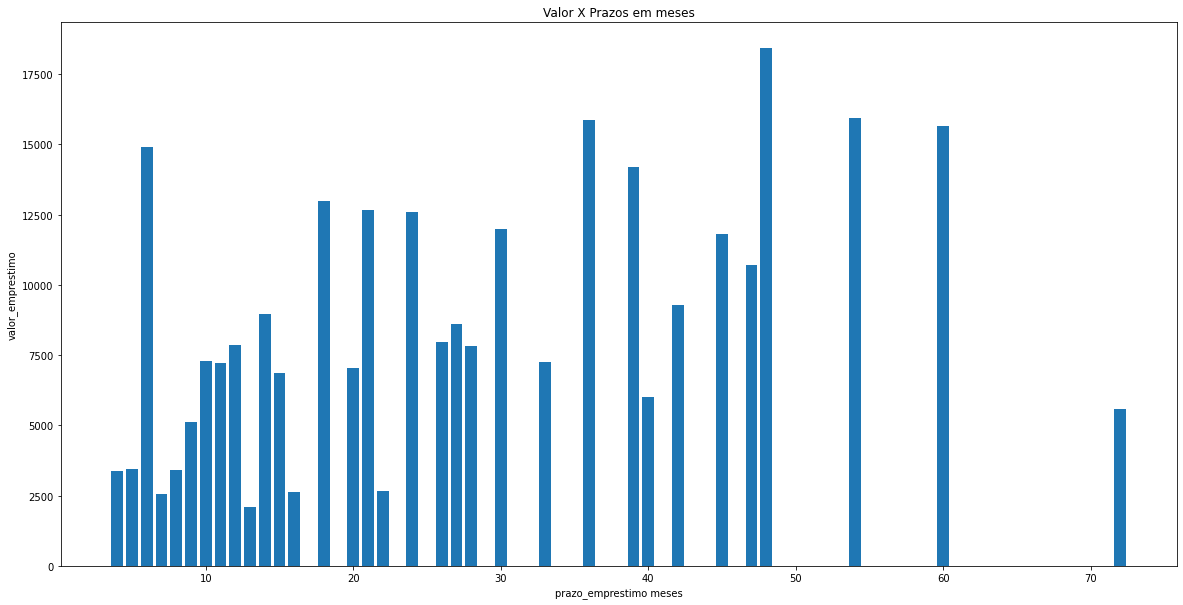

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X Prazos em meses')
plt.show()

In [ ]:
# categoria da variável sexo_est_civil
n=0
for i in dados_normais.sexo_est_civil.value_counts().index:
  n+=1
  print('(%s) =  %s'%(i,n))

(male : single) =  1
(female : divorced/separated/married) =  2
(male : married/widowed) =  3
(male : divorced/separated) =  4


In [ ]:
# Criando variável sexo
## 1 = mulher
## 0 = homem

# Criando variável estado_civil
## 1 = solteiros
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1,0,0


In [ ]:
# função roda_modelo: ajuste e validação

def roda_modelo(base_dados, classificador):

# separando  a base de modelagem e variavel resposta
  y = base_dados['default']
  x = base_dados.drop(columns='default')

# separando a base de treino e teste
  SEED = 77
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.3, random_state= SEED)
  base_treino = treino_x.shape[0] 
  base_teste = teste_x.shape[0]
  print('A base de treino tem %s elementos e a base de teste tem %s elementos.'%(base_treino,base_teste))
  print(100*'-')
# Ajustando modelo com a base de teste

  modelo = classificador  
  modelo.fit(treino_x, treino_y)
  print(100*'-')

# Matrix de Confusão

  matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format='.3g', cmap='Blues')
  plt.title('Matriz de Confusão')
  plt.show()
  print(100*'-')


# Classification Report

  previsoes = modelo.predict(teste_x)
  print(100*'-')
  print('/nClassification Report:')
  print(classification_report(teste_y, previsoes) )


# Curva ROC e AUC
  print(100*'-')
  prob_previsao = modelo.predict_log_proba(teste_x)[:,1]

  tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
  print('roc_AUC', roc_auc_score(teste_y, prob_previsao))
  
  plt.subplots(1, figsize=(5,5))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade') # taxa de verdadeiros positivo
  plt.plot([0,1], ls="--", c = 'red')# plotando linha guia pontilhada vermelha
  plt.plot([0,0],[1,0], ls="--", c = 'green'), plt.plot([1,1], ls= "--", c = 'green')  # plotando linha guia pontilhada vermelha
  plt.show()

  return modelo, matriz_confusao

In [ ]:
# Função para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns=colunas_retiradas)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


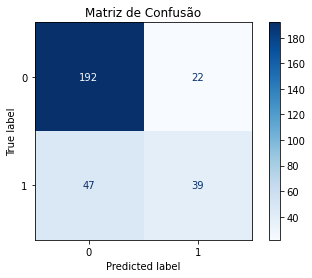

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.45      0.53        86

    accuracy                           0.77       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.76      0.77      0.76       300

----------------------------------------------------------------------------------------------------
roc_AUC 0.7590741143229733


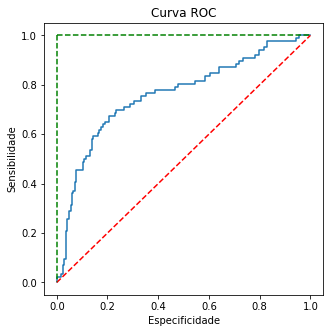

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0dd3bb1810>)

In [ ]:
roda_modelo(dados, LogisticRegression(max_iter=1000)) 

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


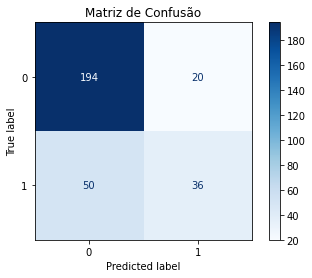

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.64      0.42      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.75      0.77      0.75       300

----------------------------------------------------------------------------------------------------
roc_AUC 0.7598348185177135


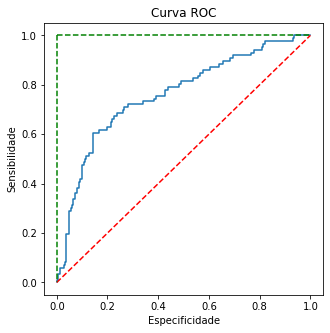

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f0dd4d393d0>)

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000)) 


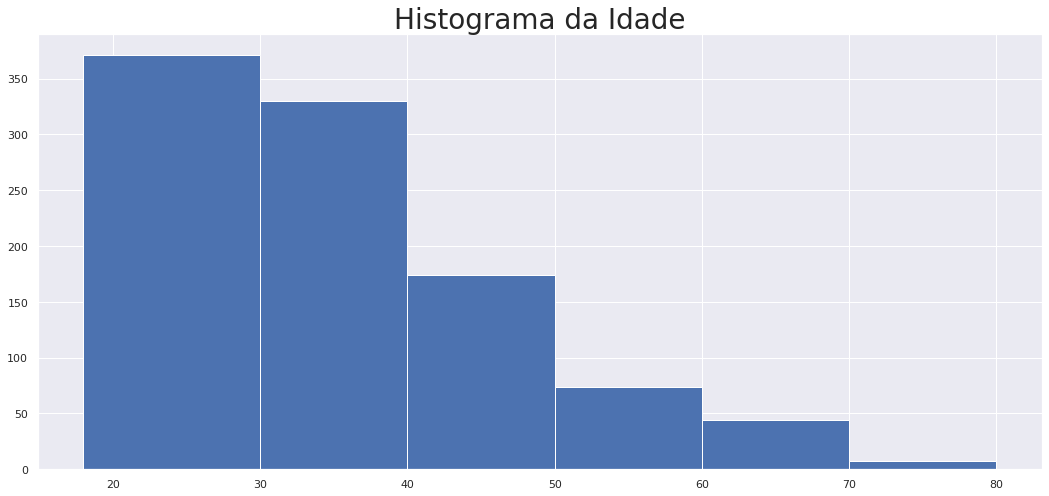

In [ ]:
dados.idade.hist(bins=[18,30,40,50,60,70,80],  figsize=(18,8) )
sns.set()
plt.title('Histograma da Idade', size=28)
plt.show()

In [ ]:
# Criar a coluna faixa_idade

dados['faixa_idade']  = pd.cut(x = dados['idade'], bins=[18,30,40,50,60,70,80], labels=[1,2,3,4,5,6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1,0,0,4


In [ ]:
# criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

dados['faixa_prazo_emprestimo']  = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1,12,24,36,48,60,72], labels=[1,2,3,4,5,6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1,0,0,4,2


In [ ]:
# faixa_valor_emprestimo

dados['faixa_valor_emprestimo']  = pd.cut(x = dados['valor_emprestimo'], bins=[1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,2000], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dados.head()

ValueError: ignored